                    Laboratorium 1 
 Ocena wpywu trendów liniowych na parametry zmienności rytmu serca

Martyna Toborek 
311843

Celem ćwiczenia jest sprawdzenie w jaki sposób trend wpływa na analizę interwału RR z zapisu sygnału EKG. 

Analizowane będą sygnały z 4 plików (chf201.txt_N.csv, chf202.txt_N.csv, nsr001.txt_N.csv, nsr002.txt_N.csv) z zapisem EKG rozpatrując trzy przedziały długości sygnału: 
1000 interwalow, 2000 interwalow, 5000 interwalow.

Następnie należy wyznaczyć parametry dziedziny czasu oraz częstotliwości i porównać je dla sygnału z trendem i bez trendu. 

Biblioteka, z której skorzystałam do analizy sygnału to biblioteka hrv. Do opracowania danych użyłam też bibliotek numpy oraz pandas.


In [21]:
import pandas as pd
import numpy as np

import hrv
from hrv.io import read_from_csv
from hrv.detrend import sg_detrend
from hrv.classical import frequency_domain

Poniższa funkcja to funkcja przepisana funkja time_domain z biblioteki hrv, z wprowadzonymi przeze mnie zmianami,  w postaci usunięcia niektórych niepotrzebnych wyliczanych parametrów. 

In [22]:
def time_dom(rri):
    diff_rri = np.diff(rri)
    rmssd = np.sqrt(np.mean(diff_rri ** 2)) 
    sdnn = np.std(rri, ddof=1) 
    pnn50 = sum(abs(np.diff(rri)) > 50)/ len(rri) * 100 
    mrri = np.mean(rri) 
    
    return dict(
        zip(
            ["rmssd", "sdnn", "pnn50", "mrri"],
            [rmssd, sdnn, pnn50, mrri],
        )
    )

Poniżej następuje pobranie danych z plików. 

In [23]:
data_1 = read_from_csv("chf201.txt_N.csv")
data_2 = read_from_csv("chf202.txt_N.csv")
data_3 = read_from_csv("nsr001.txt_N.csv")
data_4 = read_from_csv("nsr002.txt_N.csv")

a) 1000 interwałów

W poniższej komórce wycinam przedział danych, który będę analizować. 
Za pomocą wyżej zdefiniowanej funkcji wyliczam parametry w dziedzinie czasu, natomiast funkcja frequency_domain z biblioteki hrv wylicza parametry w dziedzinie częstotliwości. 

In [24]:
rri_1_10 = data_1.time_range(start=0, end=1000)
results_time_1_10 = time_dom(rri_1_10)
results_freq_1_10 = frequency_domain(rri=rri_1_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')


W poniższej komórce funkcją sg_detrend usuwam trend z wyznaczonego sygnału. Funkcja ta przepuszcza sygnał wejściowy przez dolnoprzepustowy filtr Savitzky-Golay. 
Następnie tymi samymi funkcjami wyznaczam parametry w dziedzinam czasu i częstotliwości.

In [25]:
cleaned_1_10 = sg_detrend(rri_1_10,  polyorder=3)
results_time_1_10c = time_dom(cleaned_1_10)
results_freq_1_10c = frequency_domain(rri=cleaned_1_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

Poniżej dane z trendem są przedstawione na wykresie 1 (niebieskim), natomiast na drugim (czerwonym) przedstawione są dane bez trendu.

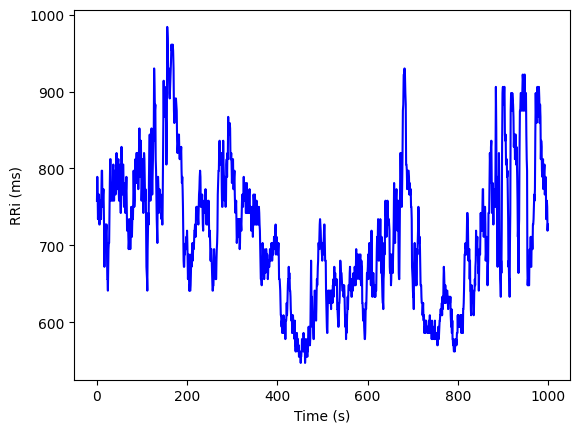

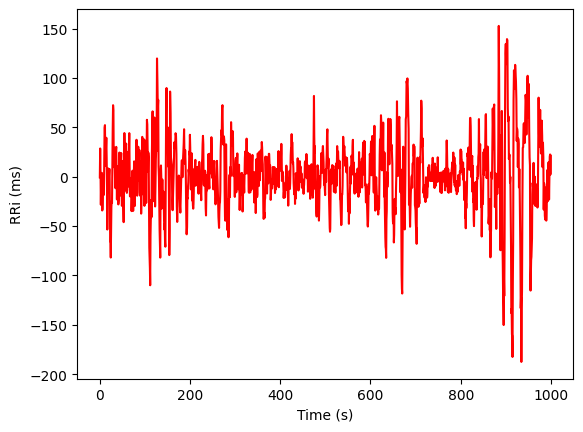

In [26]:
fig1, ax1 = rri_1_10.plot(color='b')
fig2, ax2 = cleaned_1_10.plot(color='r')

Każda poniższa analiza wygląda analogicznie jak opisana powyżej.

In [27]:
rri_2_10 = data_2.time_range(start=0, end=1000)
results_time_2_10 = time_dom(rri_2_10)
results_freq_2_10 = frequency_domain(rri=rri_2_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [28]:
cleaned_2_10 = sg_detrend(rri_2_10,  polyorder=3)
results_time_2_10c = time_dom(cleaned_2_10)
results_freq_2_10c = frequency_domain(rri=cleaned_2_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [29]:
#fig1_2, ax1_2 = rri_2_10.plot(color='b')
#fig2_2, ax2_2 = cleaned_2_10.plot(color='r')

In [30]:
rri_3_10 = data_3.time_range(start=0, end=1000)
results_time_3_10 = time_dom(rri_3_10)
results_freq_3_10 = frequency_domain(rri=rri_3_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [31]:
cleaned_3_10 = sg_detrend(rri_3_10,  polyorder=3)
results_time_3_10c = time_dom(cleaned_3_10)
results_freq_3_10c = frequency_domain(rri=cleaned_3_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [32]:
#fig1_3, ax1_3 = rri_3_10.plot(color='b')
#fig2_3, ax2_3 = cleaned_3_10.plot(color='r')

In [33]:
rri_4_10 = data_4.time_range(start=0, end=1000)
results_time_4_10 = time_dom(rri_4_10)
results_freq_4_10 = frequency_domain(rri=rri_4_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [34]:
cleaned_4_10 = sg_detrend(rri_4_10,  polyorder=3)
results_time_4_10c = time_dom(cleaned_4_10)
results_freq_4_10c = frequency_domain(rri=cleaned_4_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [35]:
#fig1_4, ax1_4 = rri_4_10.plot(color='b')
#fig2_4, ax2_4 = cleaned_4_10.plot(color='r')

Poniżej wszystkie dane są zebrane w jedną tabele dla podpunktu a). Analogicznie jest to przedstawione na końcu dla pozostałych podpunktów.

In [64]:
rt1_1 = pd.DataFrame.from_dict(results_time_1_10, orient='index', columns=['chf201 - data'])
rt1_1c = pd.DataFrame.from_dict(results_time_1_10c, orient='index', columns=['chf201 - detrended data'])
rt2_1 = pd.DataFrame.from_dict(results_time_2_10, orient='index', columns=['chf202 - data'])
rt2_1c = pd.DataFrame.from_dict(results_time_2_10c, orient='index', columns=['chf202 - detrended data'])
rt3_1 = pd.DataFrame.from_dict(results_time_3_10, orient='index', columns=['nsr001 - data'])
rt3_1c = pd.DataFrame.from_dict(results_time_3_10c, orient='index', columns=['nsr001 - detrended data'])
rt4_1 = pd.DataFrame.from_dict(results_time_4_10, orient='index', columns=['nsr002 - data'])
rt4_1c = pd.DataFrame.from_dict(results_time_4_10c, orient='index', columns=['nsr002 - detrended data'])
rf1_1 = pd.DataFrame.from_dict(results_freq_1_10, orient='index', columns=['chf201 - data'])
rf1_1c = pd.DataFrame.from_dict(results_freq_1_10c, orient='index', columns=['chf201 - detrended data'])
rf2_1 = pd.DataFrame.from_dict(results_freq_2_10, orient='index', columns=['chf202 - data'])
rf2_1c = pd.DataFrame.from_dict(results_freq_2_10c, orient='index', columns=['chf202 - detrended data'])
rf3_1 = pd.DataFrame.from_dict(results_freq_3_10, orient='index', columns=['nsr001 - data'])
rf3_1c = pd.DataFrame.from_dict(results_freq_3_10c, orient='index', columns=['nsr001 - detrended data'])
rf4_1 = pd.DataFrame.from_dict(results_freq_4_10, orient='index', columns=['nsr002 - data'])
rf4_1c = pd.DataFrame.from_dict(results_freq_4_10c, orient='index', columns=['nsr002 - detrended data'])
r12=pd.concat([np.round(rf1_1, 2), np.round(rf1_1c, 2), np.round(rf2_1, 2), np.round(rf2_1c, 2), np.round(rf3_1, 2), np.round(rf3_1c, 2), np.round(rf4_1, 2), np.round(rf4_1c, 2)], axis = 1)
r11=pd.concat([np.round(rt1_1, 2), np.round(rt1_1c, 2), np.round(rt2_1, 2), np.round(rt2_1c, 2), np.round(rt3_1, 2), np.round(rt3_1c, 2), np.round(rt4_1, 2), np.round(rt4_1c, 2)], axis = 1)
rr1 = r11.append(r12)
rr1

C:\Users\tynka\AppData\Local\Temp\ipykernel_9040\3846210356.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr1 = r11.append(r12)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd                23.16                    23.00          58.29   
sdnn                 87.96                    35.02          58.30   
pnn50                 3.31                     3.52           2.16   
mrri                703.99                    -0.02         583.38   
total_power        1815.00                  1005.37        5129.79   
vlf                 950.19                    94.52         450.30   
lf                  679.62                   726.17        2018.29   
hf                  185.19                   184.68        2661.19   
lf_hf                 3.67                     3.93           0.76   
lfnu                 78.59                    79.72          43.13   
hfnu                 21.41                    20.28          56.87   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                          58.31          15.64                    15.70   
sdnn                           40.24          55.24                    22.35   
pnn50                           2.10           0.50                     0.56   
mrri                           -0.06         619.80                     0.01   
total_power                  5022.75         647.41                   435.29   
vlf                           362.61         269.22                    10.70   
lf                           1992.83         340.86                   387.63   
hf                           2667.31          37.34                    36.95   
lf_hf                           0.75           9.13                    10.49   
lfnu                           42.76          90.13                    91.30   
hfnu                           57.24           9.87                     8.70   

             nsr002 - data  nsr002 - detrended data  
rmssd                18.88                    18.69  
sdnn                 73.43                    29.80  
pnn50                 1.37                     1.37  
mrri                805.34                     0.01  
total_power        1166.20                   836.12  
vlf                 361.35                    30.33  
lf                  749.23                   749.54  
hf                   55.62                    56.25  
lf_hf                13.47                    13.33  
lfnu                 93.09                    93.02  
hfnu                  6.91                     6.98

b) 2000 interwałów

In [37]:
rri_1_20 = data_1.time_range(start=0, end=2000)
results_time_1_20 = time_dom(rri_1_20)
results_freq_1_20 = frequency_domain(rri=rri_1_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [38]:
cleaned_1_20 =  sg_detrend(rri_1_20,  polyorder=3)
results_time_1_20c = time_dom(cleaned_1_20)
results_freq_1_20c = frequency_domain(rri=cleaned_1_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [39]:
#fig1_5, ax1_5 = rri_1_20.plot(color='b')
#fig2_5, ax2_5 = cleaned_1_20.plot(color='r')

In [40]:
rri_2_20 = data_2.time_range(start=0, end=2000)
results_time_2_20 = time_dom(rri_2_20)
results_freq_2_20 = frequency_domain(rri=rri_2_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [41]:
cleaned_2_20 =  sg_detrend(rri_2_20,  polyorder=3)
results_time_2_20c = time_dom(cleaned_2_20)
results_freq_2_20c = frequency_domain(rri=cleaned_2_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [42]:
#fig1_6, ax1_6 = rri_2_20.plot(color='b')
#fig2_6, ax2_6 = cleaned_2_20.plot(color='r')

In [43]:
rri_3_20 = data_3.time_range(start=0, end=2000)
results_time_3_20 = time_dom(rri_3_20)
results_freq_3_20 = frequency_domain(rri=rri_3_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [44]:
cleaned_3_20 =  sg_detrend(rri_3_20,  polyorder=3)
results_time_3_20c = time_dom(cleaned_3_20)
results_freq_3_20c = frequency_domain(rri=cleaned_3_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [45]:
#fig1_7, ax1_7 = rri_3_20.plot(color='b')
#fig2_7, ax2_7 = cleaned_3_20.plot(color='r')

In [46]:
rri_4_20 = data_4.time_range(start=0, end=2000)
results_time_4_20 = time_dom(rri_4_20)
results_freq_4_20 = frequency_domain(rri=rri_4_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [47]:
cleaned_4_20 =  sg_detrend(rri_4_20,  polyorder=3)
results_time_4_20c = time_dom(cleaned_4_20)
results_freq_4_20c = frequency_domain(rri=cleaned_4_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [48]:
#fig1_8, ax1_8 = rri_4_20.plot(color='b')
#fig2_8, ax2_8 = cleaned_4_20.plot(color='r')

In [65]:
rt1_2 = pd.DataFrame.from_dict(results_time_1_20, orient='index', columns=['chf201 - data'])
rt1_2c = pd.DataFrame.from_dict(results_time_1_20c, orient='index', columns=['chf201 - detrended data'])
rt2_2 = pd.DataFrame.from_dict(results_time_2_20, orient='index', columns=['chf202 - data'])
rt2_2c = pd.DataFrame.from_dict(results_time_2_20c, orient='index', columns=['chf202 - detrended data'])
rt3_2 = pd.DataFrame.from_dict(results_time_3_20, orient='index', columns=['nsr001 - data'])
rt3_2c = pd.DataFrame.from_dict(results_time_3_20c, orient='index', columns=['nsr001 - detrended data'])
rt4_2 = pd.DataFrame.from_dict(results_time_4_20, orient='index', columns=['nsr002 - data'])
rt4_2c = pd.DataFrame.from_dict(results_time_4_20c, orient='index', columns=['nsr002 - detrended data'])
rf1_2 = pd.DataFrame.from_dict(results_freq_1_20, orient='index', columns=['chf201 - data'])
rf1_2c = pd.DataFrame.from_dict(results_freq_1_20c, orient='index', columns=['chf201 - detrended data'])
rf2_2 = pd.DataFrame.from_dict(results_freq_2_20, orient='index', columns=['chf202 - data'])
rf2_2c = pd.DataFrame.from_dict(results_freq_2_20c, orient='index', columns=['chf202 - detrended data'])
rf3_2 = pd.DataFrame.from_dict(results_freq_3_20, orient='index', columns=['nsr001 - data'])
rf3_2c = pd.DataFrame.from_dict(results_freq_3_20c, orient='index', columns=['nsr001 - detrended data'])
rf4_2 = pd.DataFrame.from_dict(results_freq_4_20, orient='index', columns=['nsr002 - data'])
rf4_2c = pd.DataFrame.from_dict(results_freq_4_20c, orient='index', columns=['nsr002 - detrended data'])
r22=pd.concat([np.round(rf1_2, 2), np.round(rf1_2c, 2), np.round(rf2_2, 2), np.round(rf2_2c, 2), np.round(rf3_2, 2), np.round(rf3_2c, 2), np.round(rf4_2, 2), np.round(rf4_2c, 2)], axis = 1)
r12=pd.concat([np.round(rt1_2, 2), np.round(rt1_2c, 2), np.round(rt2_2, 2), np.round(rt2_2c, 2), np.round(rt3_2, 2), np.round(rt3_2c, 2), np.round(rt4_2, 2), np.round(rt4_2c, 2)], axis = 1)
rr2 = r12.append(r22)
rr2

C:\Users\tynka\AppData\Local\Temp\ipykernel_9040\1794872171.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr2 = r12.append(r22)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd                26.63                    26.44          43.97   
sdnn                 97.01                    38.69          50.07   
pnn50                 6.17                     6.43           1.45   
mrri                748.22                     0.00         603.53   
total_power        2393.74                  1193.70        2697.90   
vlf                1379.60                   136.16         285.37   
lf                  751.31                   793.85        1018.02   
hf                  262.82                   263.69        1394.51   
lf_hf                 2.86                     3.01           0.73   
lfnu                 74.08                    75.07          42.20   
hfnu                 25.92                    24.93          57.80   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                          43.97          14.50                    14.53   
sdnn                           31.12          67.69                    16.93   
pnn50                           1.42           0.31                     0.34   
mrri                           -0.03         563.28                    -0.00   
total_power                  2579.67         409.09                   244.38   
vlf                           179.71         190.73                     5.77   
lf                           1002.60         193.09                   213.42   
hf                           1397.36          25.27                    25.19   
lf_hf                           0.72           7.64                     8.47   
lfnu                           41.78          88.43                    89.44   
hfnu                           58.22          11.57                    10.56   

             nsr002 - data  nsr002 - detrended data  
rmssd                17.41                    17.31  
sdnn                 75.76                    27.81  
pnn50                 0.94                     0.90  
mrri                780.45                     0.00  
total_power        1016.77                   690.53  
vlf                 386.69                    26.28  
lf                  583.67                   617.52  
hf                   46.42                    46.72  
lf_hf                12.57                    13.22  
lfnu                 92.63                    92.97  
hfnu                  7.37                     7.03

c) 5000 interwałów

In [50]:
rri_1_50 = data_1.time_range(start=0, end=5000)
results_time_1_50 = time_dom(rri_1_50)
results_freq_1_50 = frequency_domain(rri=rri_1_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [51]:
cleaned_1_50 = sg_detrend(rri_1_50,  polyorder=3)
results_time_1_50c = time_dom(cleaned_1_50)
results_freq_1_50c = frequency_domain(rri=cleaned_1_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [52]:
#fig1_9, ax1_9 = rri_1_50.plot(color='b')
#fig2_9, ax2_9 = cleaned_1_50.plot(color='r')

In [53]:
rri_2_50 = data_2.time_range(start=0, end=5000)
results_time_2_50 = time_dom(rri_2_50)
results_freq_2_50 = frequency_domain(rri=rri_2_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [54]:
cleaned_2_50 =  sg_detrend(rri_2_50,  polyorder=3)
results_time_2_50c = time_dom(cleaned_2_50)
results_freq_2_50c = frequency_domain(rri=cleaned_2_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [55]:
#fig1_10, ax1_10 = rri_2_50.plot(color='b')
#fig2_10, ax2_10 = cleaned_2_50.plot(color='r')

In [56]:
rri_3_50 = data_3.time_range(start=0, end=5000)
results_time_3_50 = time_dom(rri_3_50)
results_freq_3_50 = frequency_domain(rri=rri_3_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [57]:
cleaned_3_50 =  sg_detrend(rri_3_50,  polyorder=3)
results_time_3_50c = time_dom(cleaned_3_50)
results_freq_3_50c = frequency_domain(rri=cleaned_3_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [58]:
#fig1_11, ax1_11 = rri_3_50.plot(color='b')
#fig2_11, ax2_11 = cleaned_3_50.plot(color='r')

In [59]:
rri_4_50 = data_4.time_range(start=0, end=5000)
results_time_4_50 = time_dom(rri_4_50)
results_freq_4_50 = frequency_domain(rri=rri_4_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [60]:
cleaned_4_50 =  sg_detrend(rri_4_50,  polyorder=3)
results_time_4_50c = time_dom(cleaned_4_50)
results_freq_4_50c = frequency_domain(rri=cleaned_4_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [61]:
#fig1_12, ax1_12 = rri_4_50.plot(color='b')
#fig2_12, ax2_12 = cleaned_4_50.plot(color='r')

In [66]:
rt1_5 = pd.DataFrame.from_dict(results_time_1_50, orient='index', columns=['chf201 - data'])
rt1_5c = pd.DataFrame.from_dict(results_time_1_50c, orient='index', columns=['chf201 - detrended data'])
rt2_5 = pd.DataFrame.from_dict(results_time_2_50, orient='index', columns=['chf202 - data'])
rt2_5c = pd.DataFrame.from_dict(results_time_2_50c, orient='index', columns=['chf202 - detrended data'])
rt3_5 = pd.DataFrame.from_dict(results_time_3_50, orient='index', columns=['nsr001 - data'])
rt3_5c = pd.DataFrame.from_dict(results_time_3_50c, orient='index', columns=['nsr001 - detrended data'])
rt4_5 = pd.DataFrame.from_dict(results_time_4_50, orient='index', columns=['nsr002 - data'])
rt4_5c = pd.DataFrame.from_dict(results_time_4_50c, orient='index', columns=['nsr002 - detrended data'])
rf1_5 = pd.DataFrame.from_dict(results_freq_1_50, orient='index', columns=['chf201 - data'])
rf1_5c = pd.DataFrame.from_dict(results_freq_1_50c, orient='index', columns=['chf201 - detrended data'])
rf2_5 = pd.DataFrame.from_dict(results_freq_2_50, orient='index', columns=['chf202 - data'])
rf2_5c = pd.DataFrame.from_dict(results_freq_2_50c, orient='index', columns=['chf202 - detrended data'])
rf3_5 = pd.DataFrame.from_dict(results_freq_3_50, orient='index', columns=['nsr001 - data'])
rf3_5c = pd.DataFrame.from_dict(results_freq_3_50c, orient='index', columns=['nsr001 - detrended data'])
rf4_5 = pd.DataFrame.from_dict(results_freq_4_50, orient='index', columns=['nsr002 - data'])
rf4_5c = pd.DataFrame.from_dict(results_freq_4_50c, orient='index', columns=['nsr002 - detrended data'])
r25=pd.concat([np.round(rf1_5, 2), np.round(rf1_5c, 2), np.round(rf2_5, 2), np.round(rf2_5c, 2), np.round(rf3_5, 2), np.round(rf3_5c, 2), np.round(rf4_5, 2), np.round(rf4_5c,2)], axis = 1)
r15=pd.concat([np.round(rt1_5, 2), np.round(rt1_5c, 2), np.round(rt2_5, 2), np.round(rt2_5c, 2), np.round(rt3_5, 2), np.round(rt3_5c, 2), np.round(rt4_5, 2), np.round(rt4_5c, 2)], axis = 1)
rr5 = r15.append(r25)
rr5

C:\Users\tynka\AppData\Local\Temp\ipykernel_9040\1884350286.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr5 = r15.append(r25)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd                25.13                    24.93          65.18   
sdnn                 98.69                    35.39          59.76   
pnn50                 4.47                     4.62           1.39   
mrri                748.01                    -0.02         628.04   
total_power        2026.83                   982.24        9005.22   
vlf                1190.18                   117.40        1152.78   
lf                  618.94                   646.52        4233.80   
hf                  217.71                   218.31        3618.64   
lf_hf                 2.84                     2.96           1.17   
lfnu                 73.98                    74.76          53.92   
hfnu                 26.02                    25.24          46.08   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                          65.18          14.31                    14.28   
sdnn                           45.72          68.73                    15.52   
pnn50                           1.38           0.26                     0.28   
mrri                           -0.01         600.17                     0.00   
total_power                  8772.63         314.62                   185.54   
vlf                           894.78         143.39                     4.52   
lf                           4261.15         145.40                   155.13   
hf                           3616.69          25.83                    25.90   
lf_hf                           1.18           5.63                     5.99   
lfnu                           54.09          84.91                    85.69   
hfnu                           45.91          15.09                    14.31   

             nsr002 - data  nsr002 - detrended data  
rmssd                74.72                    74.73  
sdnn                 83.65                    57.05  
pnn50                 0.78                     0.81  
mrri                776.83                     0.00  
total_power       23307.05                 23331.87  
vlf                5081.28                  4985.86  
lf                14874.04                 14987.60  
hf                 3351.74                  3358.41  
lf_hf                 4.44                     4.46  
lfnu                 81.61                    81.69  
hfnu                 18.39                    18.31

Analiza poszczególnych parametrów:

Dziedzina czasu:

Średnia wartość interwałów RR (mrri) dla sygnału bez trendu jest bardzo różna względem sygnału oryginalnego, co zgadza się z oczekiwaniami. Wartości te oscylują wokół 0.

Wartości odchylenia standardowego dla sygnałów (sdnn) bez trendu różnią się znacznie od tych wartości dla sygnału z trendem.   

Wartości pierwiastka kwadratowego ze średniej kwadratów różnic między odstępami RR (rmssd) dla sygnału z trendem i bez trendu sa takie same, lub bardzo bliskie sobie.

Różnice wartości procentowych różnic między interwałami RR przekraczającymi 50 ms (pnn50) są bardzo niewielkie, zazwyczaj rzędu 10^(-1)

Dziedzina częstotliwości:

Moc VLF  dla sygnału bez trendu jest znacznie mniejsza niż dla sygnału z trendem. Dla plików chf201, nsr001 i nsr002(dla przedziałów 1000 i 2000) różnice sięgają rzędu wielkości w dół. Dla pliku chf202 różnice są mniejsze, jednak wciąż widocze. 

Moc LF dla sygnału z trendem jest mniejsza od mocy dla sygnału bez trendu. Są to niewielkie różnice, jednak widoczne. Jedynie dla pliku chf202 dla zakresów 1000 i 2000 te wartości są bliskie sobie. 

Wartości mocy HF dla obu sygnałów są sobie bardzo bliskie. 

Wartości całkowitej mocy różnią się od siebie znacznie. Jednak różnice te zmniejszają się widocznie wraz z powiększeniem zakresu - dla zakresu 5000 róznice te są najmniejsze.

Stosunki mocy LF do mocy HF dla sygnałów bez trendu i z trendem różnią się od siebie, jednak różnice te zmniejszają się wraz z powiększeniem zakresu sygnału - dla zakresu 5000 różnice te są najmniejsze.  





Wnioski:

Po analizie wyznaczonych parametrów mogę stwierdzić, że najmniej różnic względem sygnału oryginalnego występuje dla sygnału bez trendu o największym zakresie, czyli 5000 interwałów. Jest to szczególnie widoczne po parametrach w dziedzinie częstotliwości (stosunek LF/HF oraz całkowita moc). 

Pozbycie się trendu z sygnału najbardziej wpływa na wartości odchylenia standardowego, mocy LF oraz mocy VLF. Pozostałe wartościo są bliskie lub rózne sobie. 